<a href="https://colab.research.google.com/github/Toms201/ISYS2001-Assignment2/blob/main/ISYS2001_Assignment_Two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ISYS2001 ENRON EMAIL ANALYSIS ASSIGNMENT

---


### Assesment Two - Notebooks as Business Reports
### Tom Sargent 20594567
#### Curtin University Bentley Campus S1 2022

<font color='red'>Please run the notebook scripts in order as the report is read to ensure correct data filtering and graph generation</font> 





#Executive Summary
This report analyses the Enron Email Dataset presented to the Federal District Court of America in 2006 from Email data collected between 1997 to 2003. The report begins by exploring the Email traffic by date, including the volume of emails sent by each date graphed visibly as well as listing the top 5 dates of emails sent and received involving Enron. Following this, the top 5 email accounts/users are explored in a bar graph as well as in table format to highlight the 5 most active email accounts within the organisation.

The results of the analysis are structured around the employees related to email addresses, and their respective traffic as well as the email traffic by date. Within this we find jeff.dasovich, Relation Executive at Enron and j.kaminski Marketing Director and Enron to be common occurrences as well as dates between 25/10/2001 and 29/11/2001 to have higher than usual email traffic, providing potential for further investigation to identify trends leading to fraud.

From the analysis of this data, key factors relating to the Enron corporate fraud can be explored including what employees may have been involved based on their email traffic, and on what days could the fraud have possibly been at the highest in the company.

This report has been produced using Python code to analyse the dataset, in conjunction with SQL.

#Contents Of Report
1. Introduction
2. Setup Code
3. Discussion and Analysis
4. Emails By Email Address
5. Emails By Date
6. Conclusion
7. References

#Introduction
Enron Corporation, a significant energy, commodities, and services firm established in the United States, was discovered in early 2004 for fraud, less than 30 years after its launch in 1985 (Segal, 2021). Enron's leadership deceived authorities by employing special purpose vehicles (SPVs) and special purpose entities (SPEs) to disguise its mountains of debt and hazardous assets from investors and creditors (Segal, 2021). 

The Enron Corporation narrative illustrates a firm that rose to industry leading heights only to plummet. Thousands of employees were impacted by the fated company's demise, which shocked Wall Street to its core. Enron's stock peaked at $ $90.75, and it was trading at $0.26 immediately before declaring bankruptcy on December 2, 2001 (Charge Banking. 2020).

This Business Report aims at determining the Top Emailers at Enron during the time of question between 1990 and 2002, as well as the dates with the highest email volume within the company using Python Analysis. From the released dataset of Enron company (Enron. 2015) email traffic we can analyses email frequency and occurrences to depict a narrative of the communication within the Company.

##Setup Code

In [1]:
#@title Setup Code -> Run this field to begin analysis initialisation
#To analyse the Enron dataset we must first download the given hosted dataset into the Notebook Instance
#Exception Handling with the Try/Except Method
try:
  #Run the !wget function to download the database from the hosted platform. Save the database as enron.db in the colab instance machines files.
  ## Ref: Borck, Michael. 2022. Curtin University. https://github.com/michael-borck/isys2001-assignment/blob/main/download_enron_data.ipynb 
  !wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
  print("Data Installed Successfully!")
except:
  print("Hmmm We had troubble downloading the Enron Dataset, Maybe try again?")

#There are multiple ways that the datset can be analyses - By using SQL qurieies within python to filter and sort data, or by using the Pandas module for data analsyis. In this report I have chosen to include both.
#We begin by importing SQLite 3 for SQL analysis within Python. Following this I will also import Pandas (with an alias pd) and NumPy for calculations.

#Import all packages required for the data analysis
try:
  import sqlite3
  import pandas as pd
  #Exception handling for Pandas Copy Warnings
  pd.options.mode.chained_assignment = None
  import matplotlib.pyplot as plt
  import numpy as np
  from PIL import Image
  from datetime import datetime
  from matplotlib.dates import date2num
  !pip install squarify  # pip install squarify (algorithm for treemap)
  import squarify
  print("Imported Modules Successfully!")
except:
  print("Try running this cell again...")
#connect sqlite to database that has been created enron.db
## Ref: Borck, Michael. 2022. Curtin University. https://github.com/michael-borck/isys2001-assignment/blob/main/download_enron_data.ipynb 
conn = sqlite3.connect("enron.db")

#Create a cursor (A row/column 'scanner')
cur = conn.cursor()

#To test that the import of the data was correct, and that the import of the sqlite3 module was sucessfull, I ran the following cell to check the avaliable tables.
# Using SQL display the Name of a Table within the database
## Ref: Borck, Michael. 2022. Curtin University. https://github.com/michael-borck/isys2001-assignment/blob/main/download_enron_data.ipynb 
sql='''
SELECT name FROM sqlite_master WHERE type='table';
'''
cur.execute(sql)
cur.fetchall()

--2022-05-29 04:35:01--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2022-05-29 04:35:02--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  46.2MB/s    in 19s     

2022-05-29 04:35:22 (41.9 MB/s) - ‘enron.db’ saved [853819392/853819392]

Data Ins

[('employeelist',), ('message',), ('recipientinfo',), ('referenceinfo',)]

# Discussion and Analysis

From the analysis of the database of given email records over the time of question, it is now possible to analyse the dataset with the graphs generated. Python analysis with SQL Database Queries allows for a rich data analysis and graph generation that can guide the investigation into the Enron case.

### Emails By Email Address
To begin, It is vital that the data that we are seeking to find is outlined to ensure the best results.

> The first point of analysis is who are the top 10 emailers (Incoming/Outgoing) of the organisation.

For this we need to locate
1. The table that contains the record of all messages sent/received.
2. The Emails that messages are sent from/receive messages.
3. A count of the occurrences of email addresses by entry.

Another key indicator of analysis that can be related to company emails is the email addresses that had the highest number of emails sent to or received from. This will assist in determining some of the people who were most active within the company, and therefore may have been aware of fraudulent activities occurring.

From the data/graphs below we can determine the following 10 people’s emails had the highest email traffic through the period of the given data:

1. jeff.dasovich@enron.com          6273
2. j.kaminski@enron.com             5838
3. kay.mann@enron.com               5100
4. sara.shackleton@enron.com        4797
5. tana.jones@enron.com             4437
6. chris.germany@enron.com          3686
7. no.address@enron.com             3511
8. enron.announcements@enron.com    2838
9. matthew.lenhart@enron.com        2784
10. debra.perlingiere@enron.com     2549

There is a visible decline evident in the graph which indicates a gradual negative trend as the emails decrease. It is also interesting to note the grouping within the graph, as the top 2 emails have similar email rates, followed by emailers 3-5, and finally 6 -10.

I have also researched the relevant emails roles within the company, as this could provide further insight into email traffic.

1. jeff.dasovich@enron.com          government relations executive
2. j.kaminski@enron.com             Managing Director for Research
3. kay.mann@enron.com               head of legal
4. sara.shackleton@enron.com        unknown
5. tana.jones@enron.com             Internal communications
6. chris.germany@enron.com          Unknown
7. no.address@enron.com             Unknown
8. enron.announcements@enron.com    Announcements Email
9. matthew.lenhart@enron.com        trading
10. debra.perlingiere@enron.com     Legal department
Employee Data (Chediak, et al. 2021)

Following this is a Treemap, allowing for another visual representation of email addresses within Enron and the size of their importance. From this it is visually attainable that jeff.dasovich had the largest proportion of emails sent over the period, however, many of his colleagues were not far behind. It is noticeable that similar Treemap portions occur between the 4th and 10th top emailers at the organisation, likely indicating similar level of involvement within the company. This could also indicate these people were in particular managerial roles, requiring a large number of email communications in general. 

Graph successfully Generated


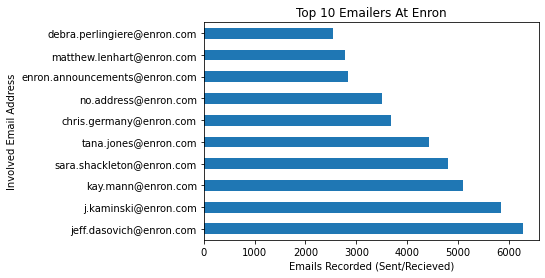

In [2]:
#@title Run this field for Email Traffic Analysis
# Select all data from the table 'messages' using SQL
try:
  sql='''
  SELECT * from message;
  '''
  # Load the data into a DataFrame names dfmessages
  dfmessages = pd.read_sql_query(sql, conn)
  dfmessages
except AttributeError as e:
  print(e)
  print("The SQL data table can not be found, trying to download the database again...")
  !wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
  sql='''
  SELECT * from message;
  '''
  dfmessages = pd.read_sql_query(sql, conn)
  dfmessages
#Count 10 times (for top 10)
n = 10

#In the dataframe dfmessages find the top count of values in the sender column and complete 'n' times
## REF: https://stackoverflow.com/questions/48590268/pandas-get-the-most-frequent-values-of-a-column
dfmessages['sender'].value_counts().index.tolist()[:n]

#Now we can confirm that the above emails are the top 10 emailers of the organisation, however, the data does not display how many emails each send.
# in the datataframe defined, within the column 'sender' count the top 10 occurances
## Ref: https://mode.com/python-tutorial/counting-and-plotting-in-python/
dfmessages['sender'].value_counts()[:10]

#Now that a list exists, and the corect data can be confirmed, we need to create a plot that can be included in the discussion. Using the 'barh' style of graph we can easially see the y axis labels horizontially, rather than having to rotate x axis emails.
# As a bar histogram, plot the top 10 occurances in the sender column of the dfmessages dataframe
## Ref: https://stackoverflow.com/questions/26476668/frequency-plot-in-python-pandas-dataframe
try:
  dfmessages['sender'].value_counts()[:10].plot(kind='barh')
  # Change x-axis label to "Emails Recorded (Sent/Recieved)"
  plt.xlabel("Emails Recorded (Sent/Recieved)")
  # Change y-axis label to "Involved Email Address"
  plt.ylabel("Involved Email Address")
  # Change the Plot title to "Top 10 Emailers At Enron"
  plt.title("Top 10 Emailers At Enron")
  # Save the plot as a png so it can be called later in the report
  plt.savefig('emailers1.png', dpi=200, bbox_inches='tight')
  print('Graph successfully Generated')
except:
  print('The Graph Could Not Be Generated, Did you run the cells in order?')

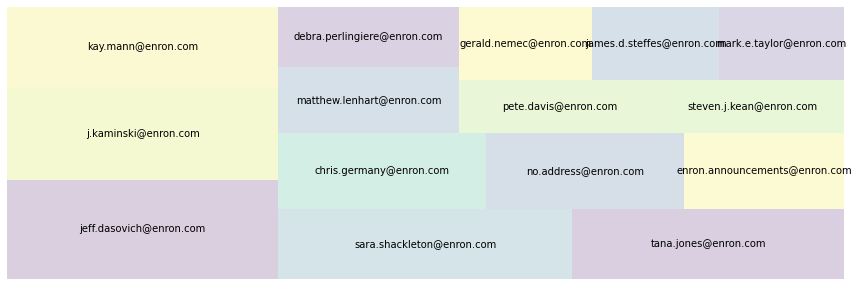

Graph successfully Generated


In [3]:
#@title Run this cell to generate Treemap
#Make a Pandas dataframe for the exact data to use in the Treemap. Top 15 Emailers.
try:
  dftreemap = dfmessages['sender'].value_counts().rename_axis("Sender").reset_index(name='Count')
  dftreemap = dftreemap.head(n=15)
  #Define the treemap parameters, data, axis.
  ## Ref: https://www.python-graph-gallery.com/treemap/
  plt.rcParams['figure.figsize'] = [15, 5]
  squarify.plot(sizes=dftreemap['Count'], label=dftreemap['Sender'], alpha=0.2 )
  plt.axis('off')
  plt.show()
  print('Graph successfully Generated')
except:
  print('The Graph Could Not Be Generated, Did you run the cells in order?')

### Emails By Date
Further investigation of the dates which had the most email traffic, sent or received from within Enron during the period in question will provide a more detailed analysis.

> The second point of analysis is what dates during the active period of the company's Email Servers recorded the highest passthrough of emails Sent or Received.

For this we need to locate
1. The table that contains the record of all messages sent/received.
2. The Emails that messages are sent from/receive messages.
3. A count of the occurrences of date by entry (without timestamp).

From the second graph we can see that there are 2 main peaks that occur around the end of 2001 as well as have 5 peaks total ranging from the start of 2001 to mid 2002. When the company first recorded email usage in 1999, there was limited emails being sent between employees or externally. Emailing via the internet started to grow dramatically in the late 1990's (Left. 2002) and therefore we can see an increasing trend between the availability of emails to users as we progress into the early 2000's.

Enron filed bankruptcy on December 2nd 2001 (Segal. 2021), which correlates with the flatline of emails throughout the company towards the end of the graph. We can see this decline due to the volume of staff removed from the company (Segal. 2021).

Further analysis of the data indicates the top 10 days of email traffic (sent/received) by date, which allows us to more clearly see the exact dates that the company had a higher email throughput. This can be seen in Figure 3: Top 10 Email Volume Dates.

From this chart we can determine the top 5 dates as follows
1. 2001-10-25    Emails: 2207
2. 2001-10-29    Emails: 2180
3. 2001-11-27    Emails: 2045
4. 2001-11-26    Emails: 2031
5. 2001-10-22    Emails: 2025

What is interesting to note here is that 5 of the busiest email days all occurred within 60 days of each other, indicating there was a crucial period in the Enron timeline that may have been involved in the fraud.

I have also highlighted key peaks within the graph to indicate key time period of interest. The period in green can be seen as the highest peak of emails within the company. This is around late 2001 to early 2002 which could indicate a time of key importance within the company in regards to the fraud scheme.

Prior to this there was two periods highlighted in the yellow ribbon which are also key areas of interest. These are unusual peaks in activity, however they both fall at the end of a gradual positive trend in emails sent, indicating this may be a seasonal occurrence.

There is one final peak highlighted by yellow ribbon after the green peak, which is the last highest day of emails from Enron. This could possibly be related to the closure of Enron, and the day that many staff found out about the fraud scheme, hence many internal emails.


           Dates  Count
1072  1999-01-04      3
1116  1999-01-05      2
1115  1999-01-06      2
1087  1999-01-07      3
1051  1999-01-08      4
...          ...    ...
1034  2002-07-12      5
1149  2002-09-18      1
1117  2002-09-22      2
1153  2002-10-09      1
1152  2002-12-21      1

[1178 rows x 2 columns]
Data Converted Successfully!
Graph successfully Generated


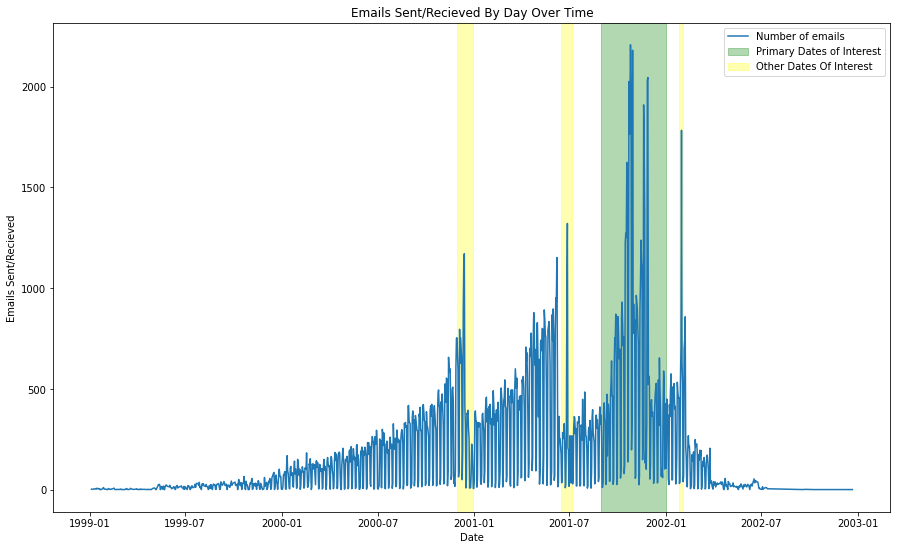

In [4]:
#@title Run this cell to Analyse Email Traffic By Date
#Create a dataframe in Pandas from the messages table isolated by SQL previousley
try:
  df = pd.DataFrame(dfmessages)
  # Define a start an end date for the period of analysis
  ## Ref: https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates
  start_date = '1999-01-01'
  end_date = '2003-01-01'
  # Select DataFrame rows between two dates
  mask = (dfmessages['date'] > start_date) & (dfmessages['date'] <= end_date)
  dftime = df.loc[mask]
  # Print/Display df2 to check the date filter has worked.
  dftime
  # In df2, create a new column called 'date_new' and convert the content of 'date' top Pandas datetime
  dftime['date_new'] = pd.to_datetime(dftime['date'])
  # Using pandad datetime function, convert the contents of 'date_new' to date format only
  #Ref: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
  dftime['date_new'] = dftime['date_new'].dt.date
  dftime
  #Count the quantity of matching values in the dataframe column 'date_new' and assign to new dataframe
  ##Ref: https://mode.com/python-tutorial/counting-and-plotting-in-python/
  dfdatecount = dftime['date_new'].value_counts()
  dfdatecount
  # Rename the columns and reset the index to create a new dataframe with just the required date for the plot
  dfdatecount = dftime['date_new'].value_counts().rename_axis("Dates").reset_index(name='Count')
  # Sort values by Date
  ## Ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
  dfdatecount = dfdatecount.sort_values("Dates")
  print('Data Converted Successfully!')
except AttributeError as e:
  print(e)
  print('Couldnt Find The Required Data Tables, Did you run the cells in order?')

#Using the MatplotLib Library create a bar graph with size 15,9
## Ref: https://www.w3schools.com/python/pandas/pandas_plotting.asp
try:
  fig, ax = plt.subplots(figsize=(15, 9))
  #Add Graph Ribbons to make periods of time stand out clearly
  ax.axvspan(date2num(datetime(2001,8,30)), date2num(datetime(2002,1,1)), 
           label="Point Of Interest",color="green", alpha=0.3)
  ax.axvspan(date2num(datetime(2000,11,30)), date2num(datetime(2000,12,30)), 
           label="Point Of Interest",color="yellow", alpha=0.3)
  ax.axvspan(date2num(datetime(2001,6,15)), date2num(datetime(2001,7,5)), 
           label="Point Of Interest",color="yellow", alpha=0.3)
  ax.axvspan(date2num(datetime(2002,1,25)), date2num(datetime(2002,2,1)), 
           label="Point Of Interest",color="yellow", alpha=0.3)
  #Plot Dates on x-axis and Count on y-axis
  ax.plot(dfdatecount['Dates'], dfdatecount['Count']);
  #Define the x/y labels
  plt.xlabel('Date')
  plt.ylabel('Emails Sent/Recieved')
  plt.legend(['Number of emails', 'Primary Dates of Interest' ,'Other Dates Of Interest'])
  #Add a title
  plt.title('Emails Sent/Recieved By Day Over Time')
  #Save the plot to a png so it can be recalled in the report analysis
  ## Ref: https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/
  plt.savefig('datetimeseries.png', dpi=200)
  print('Graph successfully Generated')
except:
  print('The Graph Could Not Be Generated, Did you run the cells in order?')

Graph successfully Generated


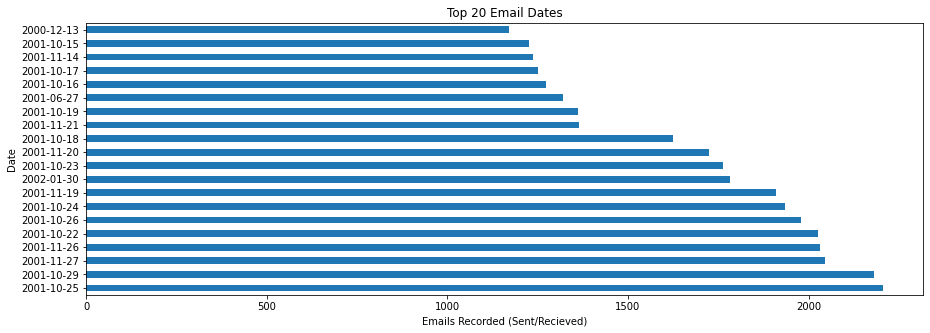

In [5]:
#@title Run this Cell to generate top 20 email dates
# As a bar histogram, plot the top 10 occurances in the sender column of the dfmessages dataframe
## Ref: https://www.w3schools.com/python/pandas/pandas_plotting.asp
try:
  plot2 = dftime['date_new'].value_counts()[:20].plot(kind='barh')
  # Change x-axis label to "Emails Recorded (Sent/Recieved)"
  plt.xlabel("Emails Recorded (Sent/Recieved)")
  # Change y-axis label to "Involved Email Address"
  plt.ylabel("Date")
  # Change the Plot title to "Top 10 Emailers At Enron"
  plt.title("Top 20 Email Dates")
  # Save the plot as a png so it can be recalled later in the report
  plt.savefig('top20dates.png', dpi=200, bbox_inches='tight')
  print('Graph successfully Generated')
except:
  print('The Graph Could Not Be Generated, Did you run the cells in order?')

# Conclusion

In the case of Enron’s fraud scandal, we can now presume a period of mass email activity between October and November of 2001, not long before the company’s fraud exposure and bankruptcy in 2003. We can also determine from the emailers list, that many of the top emailers sat in high positions such as managers or key people from the legal/marketing team. Furthermore, the combination of date and emailer based analyses allows us to understand that specific spikes in emails in late 2001 could be correlated to higher individual email traffic by employees of authority.

In conclusion, by using Python to enable data analytics we can generate detailed graphical analysis of given data to aid the investigation into the Enron Fraud case of 2006. In a world that is constantly shifting towards the digital workplace, data analysis like this becomes increasingly frequent in criminal and civil law cases, and is an asset to investigations. 

# References

Banking, Charge. 2020. "Enron Banking Scam Scandal - the Firm That Rose to      Dizzying Heights Only to Plummet​ - Chargebacking." Banking Scandals.

Chediak, Mark. Farrell, Greg. Malik, Naureen S. 2021. "Enron's Cast of Characters: Where They Are 20 Years after the Fall."

Corp, Enron, and William Cohen. 2015. Enron Email Dataset.


Left, Sarah. 2002. "Email Timeline - Technology."

Segal, Troy. 2021. "Enron Scandal: The Fall of a Wall Street Darling."

###Code References (Code adapted from)
https://github.com/michael-borck/isys2001-assignment/blob/main/download_enron_data.ipynb
https://stackoverflow.com/questions/48590268/pandas-get-the-most-frequent-values-of-a-column
https://mode.com/python-tutorial/counting-and-plotting-in-python/
https://stackoverflow.com/questions/26476668/frequency-plot-in-python-pandas-dataframe
https://www.python-graph-gallery.com/treemap/
https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates
https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
https://mode.com/python-tutorial/counting-and-plotting-in-python/
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
https://www.w3schools.com/python/pandas/pandas_plotting.asp
https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/
https://www.w3schools.com/python/pandas/pandas_plotting.asp
